# 0.0 IMPORTS

In [1]:
import random
import warnings
import pandas      as pd
import numpy       as np
import seaborn     as sns

import matplotlib.pyplot as plt
from sklearn.metrics         import confusion_matrix
from sklearn                 import model_selection as ms
from sklearn                 import preprocessing as pp
from sklearn                 import metrics       as m
from keras                   import models as ml
from keras                   import layers as l
from IPython.core.display    import HTML

warnings.filterwarnings( 'ignore' )

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

## 0.2 Loading Data

In [45]:
df_raw = pd.read_csv('train_users.csv', low_memory=True)

df_sessions = pd.read_csv('sessions.csv', low_memory=True)


# 1.0 Passo 01 - DESCRIÇÃO DOS DADOS

In [46]:
df1 = df_raw.copy()
df1_sessions = df_sessions.copy()

## 1.1 Data Dimensions

In [5]:
print(f'Número de linhas é igual a: {df1.shape[0]}')
print(f'Número de colunas é igual a: {df1.shape[1]}')

Número de linhas é igual a: 213451
Número de colunas é igual a: 16


In [47]:
#Sessions
print(f'Número de linhas é igual a: {df1_sessions.shape[0]}')
print(f'Número de colunas é igual a: {df1_sessions.shape[1]}')

Número de linhas é igual a: 10567737
Número de colunas é igual a: 6


## 1.2 Data Types

In [6]:
#Data types df1
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [48]:
#Data types df1_sessions
df1_sessions.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

## 1.3 Check NA

In [7]:
df1.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [49]:
df1_sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

## 1.4 Fillout NA

In [8]:
#Revover NAs
df1 = df1.dropna()
df1.shape

(68171, 16)

## 1.5 Change Type

In [9]:
#date_account_created   
df1['date_account_created']=pd.to_datetime( df1['date_account_created'])
#timestamp_first_active  
df1['timestamp_first_active']=pd.to_datetime( df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

#date_first_booking
df1['date_first_booking']=pd.to_datetime( df1['date_first_booking'])
#age                      
df1['age']= df1['age'].astype('int64')


## 1.6 Check Balanced Data

In [10]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0 PASSO 02 - Data Filtering


In [11]:
df2 =df1.copy()

## 2.1 Filtering Rows

## 2.2 Columns Selection

# 3.0 PASSO 03 - DATA PREPARATION


In [12]:
df3= df2.copy()

In [13]:
# Dummy Variable
df3_dummy = pd.get_dummies( df3.drop( ['id','country_destination'], axis=1 ) )

#Join ID and country_destiantion
df3 =pd.concat( [  df3[['id', 'country_destination']], df3_dummy],axis=1)
df3


,id,country_destination,date_account_created,timestamp_first_active,date_first_booking,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
2,4ft3gnwmtx,US,2010-09-28,2009-06-09 23:12:47,2010-08-02,56,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,other,2011-12-05,2009-10-31 06:01:29,2012-09-08,42,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,US,2010-09-14,2009-12-08 06:11:05,2010-02-18,41,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,lsw9q7uk0j,US,2010-01-02,2010-01-02 01:25:58,2010-01-05,46,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0d01nltbrs,US,2010-01-03,2010-01-03 19:19:05,2010-01-13,47,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,FR,2014-06-30,2014-06-30 23:01:36,2014-06-30,55,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
213439,msucfwmlzc,US,2014-06-30,2014-06-30 23:47:29,2015-03-16,43,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
213441,omlc9iku7t,ES,2014-06-30,2014-06-30 23:51:51,2014-08-13,34,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
213443,0k26r3mir0,US,2014-06-30,2014-06-30 23:53:40,2014-07-13,36,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


# 4.0 PASSO 04 - Feature Selection

In [14]:
#Deletar as colunas desnecessarias pro modelo
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
df4= df3.drop(cols_drop, axis=1)

In [15]:
df4.sample().T

,202274
id,2e4b52lki1
country_destination,US
age,25
signup_flow,0
gender_-unknown-,1
...,...
first_browser_Sogou Explorer,0
first_browser_Stainless,0
first_browser_TenFourFox,0
first_browser_TheWorld Browser,0


In [16]:
X = df4.drop(['id', 'country_destination'], axis=1)
y = df4['country_destination'].copy()

In [17]:
#Split dataset
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=32 ) 

# 5.0 PASSO 05 - Machine Learning Model

In [18]:
x_train = X_train
x_test = X_test

## 5.1 Baseline Model 

In [26]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform( y_train.values.reshape(-1, 1 ) ).toarray()

In [19]:
df1['country_destination'].value_counts(normalize=True).sort_index().to_list()

[0.00636634345982896,
 0.01569582373736633,
 0.012453976030863564,
 0.024863945079285913,
 0.05408458142025201,
 0.02593478165202212,
 0.02976338912440774,
 0.008801396488242802,
 0.002317701075237271,
 0.7088644731630752,
 0.11085358876941809]

In [20]:
#random.choices(populacao =, weght= , k=)
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().to_list()
k_num = y_test.shape[0]
country_destination_weghts = df1['country_destination'].value_counts(normalize=True).sort_index().to_list()

# Modelo aleatório
yhat_random = random.choices(population= country_destination_list, 
                             weights = country_destination_weghts,
                             k = k_num)
len( yhat_random )

13635

Accuracy: 0.5177851118445178
Balanced Accuracy: 0.09038502365673673
Balanced Accuracy: 0.002329571113932394


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.03      0.04      0.04       214
          DE       0.00      0.00      0.00       170
          ES       0.02      0.02      0.02       345
          FR       0.05      0.05      0.05       710
          GB       0.02      0.02      0.02       344
          IT       0.03      0.03      0.03       423
          NL       0.00      0.00      0.00       128
          PT       0.00      0.00      0.00        36
          US       0.71      0.71      0.71      9624
       other       0.12      0.12      0.12      1540

    accuracy                           0.52     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.52      0.52      0.52     13635



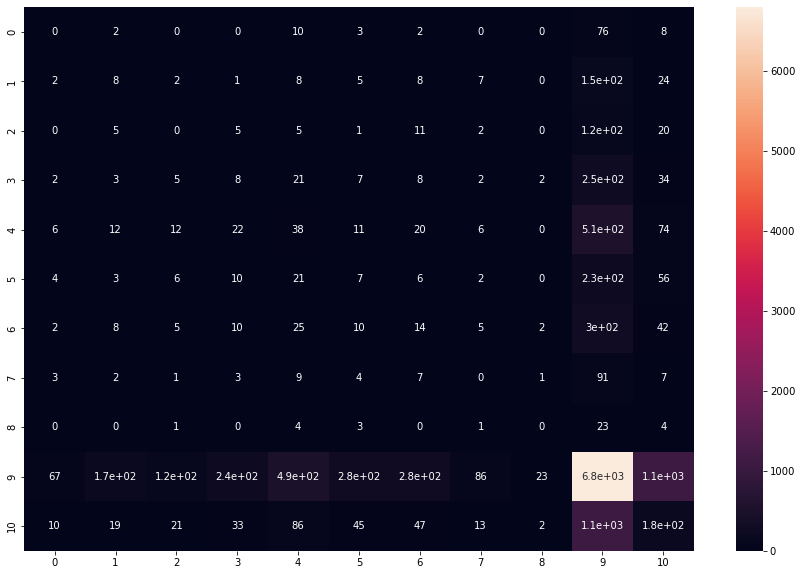

In [33]:
#Accuracy
acc_random = m.accuracy_score(y_test, yhat_random)
print(f'Accuracy: {acc_random}')

#Balanced Accuracy
balanced_acc_random = m.balanced_accuracy_score(y_test, yhat_random)
print(f'Balanced Accuracy: {balanced_acc_random}')

#Kappa Metrics
kappa_random = m.cohen_kappa_score(y_test, yhat_random)
print(f'Balanced Accuracy: {kappa_random}')
print('\n')

#Classification Report
print(m.classification_report(y_test, yhat_random))

#Confusion Matrix
cm = confusion_matrix( y_test, yhat_random)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True);


## 5.2 Neural Network - MLP

In [27]:
# Model definition
model = ml.Sequential()
model.add(l.Dense( 130, input_dim=x_train.shape[1], activation='relu') )
model.add(l.Dense( 11, activation='softmax') )

#Model compile
model.compile( loss= 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'] )

#training model
model.fit( x_train , y_train_nn, epochs=100 )

Epoch 1/100
1705/1705 [==============================] - 24s 1ms/step - loss: 1.4066 - accuracy: 0.6949
Epoch 2/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2905 - accuracy: 0.7050: 0s - loss: 1.2973 - 
Epoch 3/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2359 - accuracy: 0.7074
Epoch 4/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2332 - accuracy: 0.7067
Epoch 5/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1963 - accuracy: 0.7069
Epoch 6/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1918 - accuracy: 0.7082
Epoch 7/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1594 - accuracy: 0.7104
Epoch 8/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1532 - accuracy: 0.7097
Epoch 9/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1426 - accuracy: 0.7092
Epoch 10/100
1705/1705 [==========================

1705/1705 [==============================] - 2s 1ms/step - loss: 1.1078 - accuracy: 0.7101
Epoch 80/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1006 - accuracy: 0.7110
Epoch 81/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0934 - accuracy: 0.7140
Epoch 82/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1010 - accuracy: 0.7117
Epoch 83/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0986 - accuracy: 0.7118
Epoch 84/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1095 - accuracy: 0.7080
Epoch 85/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1018 - accuracy: 0.7110
Epoch 86/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0872 - accuracy: 0.7158
Epoch 87/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1026 - accuracy: 0.7110
Epoch 88/100
1705/1705 [==============================] - 2s 1ms/step - loss:

In [29]:
#Predict
pred_nn = model.predict( x_test )

#invert prediction
yhat_nn = ohe.inverse_transform( pred_nn)

#Prediction Prepare
y_test_nn = y_test.to_numpy()
yhat_nn =  yhat_nn.reshape(1, -1 )[0]

Accuracy: 0.7035570223689036
Balanced Accuracy: 0.0916445594503479
Kappa score: 0.0008925000446866616


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.00      0.00      0.00       214
          DE       1.00      0.01      0.01       170
          ES       0.00      0.00      0.00       345
          FR       0.00      0.00      0.00       710
          GB       0.00      0.00      0.00       344
          IT       0.17      0.00      0.00       423
          NL       0.00      0.00      0.00       128
          PT       0.00      0.00      0.00        36
          US       0.71      1.00      0.83      9624
       other       0.15      0.00      0.01      1540

    accuracy                           0.70     13635
   macro avg       0.18      0.09      0.08     13635
weighted avg       0.53      0.70      0.58     13635



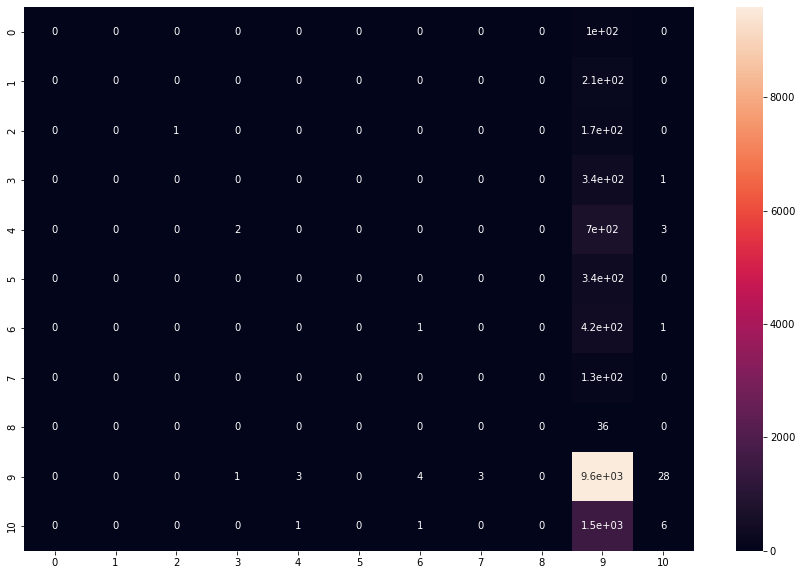

In [30]:
#Accuracy
acc_nn = m.accuracy_score(y_test_nn, yhat_nn)
print(f'Accuracy: {acc_nn}')

#Balanced Accuracy
balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
print(f'Balanced Accuracy: {balanced_acc_nn}')

#Kappa Metrics
kappa_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
print(f'Kappa score: {kappa_nn}')
print('\n')

#Classification Report
print(m.classification_report(y_test_nn, yhat_nn))

#Confusion Matrix
cm = confusion_matrix( y_test_nn, yhat_nn)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True);



## 5.2.3 NN Performance - Cross Validation

In [40]:
#Generate k-fold
num_folds = 5
kfold = ms.StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=32)

balanced_acc_list = []
kappa_acc_list = []

i = 1

for train_ix, val_ix in kfold.split(x_train, y_train):
    print(f'Fold number {i}/{num_folds}\n')
    #Get fold
    x_train_fold = x_train.iloc[train_ix]
    y_train_fold = y_train.iloc[train_ix]
    
    x_val_fold = x_train.iloc[val_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    #target hot_encoding
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform(y_train_fold.values.reshape( -1, 1)).toarray()
    
    #Model definition
    model = ml.Sequential()
    model.add(l.Dense(256, input_dim=x_train.shape[1], activation='relu'))
    model.add(l.Dense(11, activation='softmax'))
    
    #Compile Model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #training model
    model.fit( x_train_fold, y_train_fold_nn, epochs=100, batch_size=32, verbose=0)
    
    
    # prediction
    pred_nn = model.predict(x_val_fold)
    yhat_nn = ohe.inverse_transform( pred_nn)
    
    #prepare data
    y_test_nn = y_val_fold.to_numpy()
    yhat_nn = yhat_nn.reshape( 1, -1)[0]
    
    #metrics
    
    #Balanced Accuracy
    balanced_acc_nn = m.balanced_accuracy_score( y_test_nn, yhat_nn )
    balanced_acc_list.append( balanced_acc_nn)
   
    #Kappa Metrics
    kappa_acc_nn = m.cohen_kappa_score( y_test_nn, yhat_nn )
    kappa_acc_list.append( kappa_acc_nn)
    
    i += 1

Fold number 1/5
Fold number 2/5
Fold number 3/5
Fold number 4/5
Fold number 5/5


In [44]:
print(f'Avg Balanced Accuracy: {np.mean(balanced_acc_list)} +/- {np.std(balanced_acc_list)}\n')
      
print(f'Avg Kappa: {np.mean(kappa_acc_list)} +/- {np.std(kappa_acc_list)}')

Avg Balanced Accuracy: 0.09146514236891595 +/- 0.0005706182741643112

Avg Kappa: 0.0033463441292054695 +/- 0.002795698901172642
